Importing the dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# sns.set()

data collection and processing

In [2]:
titanic_data = pd.read_csv('train.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_data.shape

(891, 12)

getting some information

In [4]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Checking the number of missing values in each column

In [5]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Handing the missing values

In [6]:
titanic_data = titanic_data.drop(columns='Cabin', axis=1)

In [7]:
titanic_data = titanic_data.drop(columns='Name', axis=1)

droping the Cabin column

In [8]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

Filling missing values of Age with it's mean

In [9]:
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

In [10]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

Filliing missing values of Embarked with it's most frequent value (Mode value)

In [11]:
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

In [12]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Data Analysis

statistical measures

In [13]:
titanic_data.describe(include='all')

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,891.000000,891.000000,891.000000,891,891.000000,891.000000,891.000000,891,891.000000,891
unique,NaN,NaN,NaN,2,NaN,NaN,NaN,681,NaN,3
top,NaN,NaN,NaN,male,NaN,NaN,NaN,347082,NaN,S
freq,NaN,NaN,NaN,577,NaN,NaN,NaN,7,NaN,646
mean,446.000000,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN
std,257.353842,0.486592,0.836071,NaN,13.002015,1.102743,0.806057,NaN,49.693429,NaN
min,1.000000,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN
25%,223.500000,0.000000,2.000000,NaN,22.000000,0.000000,0.000000,NaN,7.910400,NaN
50%,446.000000,0.000000,3.000000,NaN,29.699118,0.000000,0.000000,NaN,14.454200,NaN
75%,668.500000,1.000000,3.000000,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN


finding the number of people who survived and who not

In [14]:
titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Data visualization

C:\Users\harsh\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

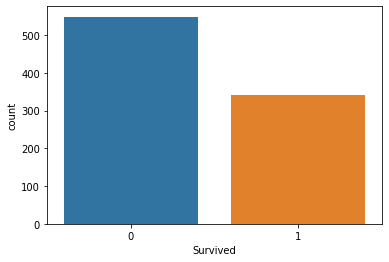

In [15]:
sns.countplot('Survived', data=titanic_data)

C:\Users\harsh\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

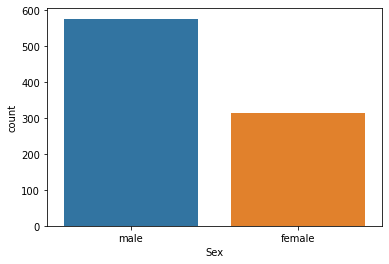

In [16]:
sns.countplot('Sex', data=titanic_data)

Number of survivors gender wise

C:\Users\harsh\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

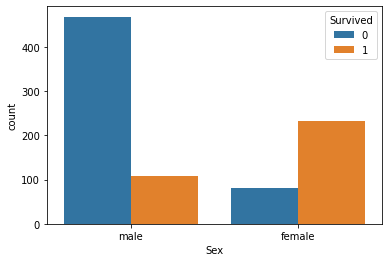

In [17]:
sns.countplot('Sex',hue='Survived', data=titanic_data)

C:\Users\harsh\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

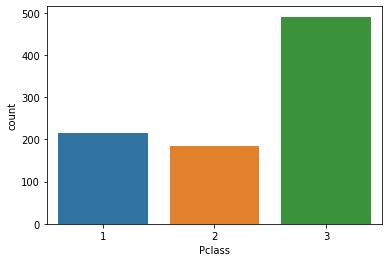

In [18]:
sns.countplot('Pclass', data=titanic_data)

Number of survivors based on class

C:\Users\harsh\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

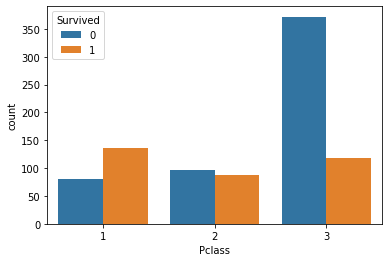

In [19]:
sns.countplot('Pclass',hue='Survived' ,data=titanic_data)

C:\Users\harsh\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

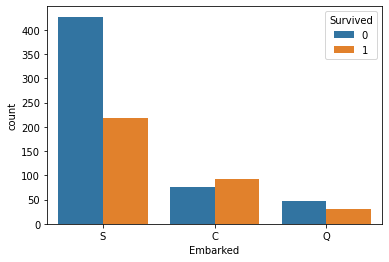

In [20]:
sns.countplot('Embarked',hue='Survived' ,data=titanic_data)

Changing the categorical columns in Numercal values

In [21]:
titanic_data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [22]:
titanic_data.replace({'Sex':{'male':0, 'female':1}, 'Embarked':{'S':0, 'C':1, 'Q':2}}, inplace=True)

In [23]:
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,1,35.0,1,0,113803,53.1000,0
4,5,0,3,0,35.0,0,0,373450,8.0500,0


separating predictors and target values

In [25]:
X = titanic_data.drop(columns=['PassengerId', 'Ticket', 'Survived'], axis=1)
Y = titanic_data['Survived']

In [26]:
X, Y

(     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
 0         3    0  22.000000      1      0   7.2500         0
 1         1    1  38.000000      1      0  71.2833         1
 2         3    1  26.000000      0      0   7.9250         0
 3         1    1  35.000000      1      0  53.1000         0
 4         3    0  35.000000      0      0   8.0500         0
 ..      ...  ...        ...    ...    ...      ...       ...
 886       2    0  27.000000      0      0  13.0000         0
 887       1    1  19.000000      0      0  30.0000         0
 888       3    1  29.699118      1      2  23.4500         0
 889       1    0  26.000000      0      0  30.0000         1
 890       3    0  32.000000      0      0   7.7500         2
 
 [891 rows x 7 columns],
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 886    0
 887    1
 888    0
 889    1
 890    0
 Name: Survived, Length: 891, dtype: int64)

#### Splitting the data into training and test

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [32]:
X_train.shape, X_test.shape


((712, 7), (179, 7))

### Model training (Logistic Regression)

In [34]:
model = LogisticRegression()

training the logistic model with training data

In [35]:
model.fit(X_train, Y_train)

C:\Users\harsh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Accuracy Score of Training data

Model Evalution

In [36]:
X_train_prediction = model.predict(X_train)

In [49]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print("Accuracy Score of training_data", training_data_accuracy*100., "%")

Accuracy Score of training_data 80.75842696629213 %


### Accuracy Score of Test data

In [41]:
X_test_prediction = model.predict(X_test)

In [47]:
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print("Accuracy Score of test_data", test_data_accuracy*100, "%")

Accuracy Score of test_data 78.2122905027933 %


In [90]:
df2 = pd.read_csv('test.csv')

In [64]:
df2.isnull().sum(), df2.shape

(PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age             86
 SibSp            0
 Parch            0
 Ticket           0
 Fare             1
 Cabin          327
 Embarked         0
 dtype: int64,
 (418, 11))

In [65]:
df2 = df2.drop(columns='Cabin', axis=1)

In [72]:
df2 = df2.drop(columns='Name', axis=1)

In [82]:
df2 = df2.drop(columns=['PassengerId', 'Ticket'], axis=1)

In [83]:
df2.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [84]:
df2['Age'] = df2['Age'].fillna(df2['Age'].mean())

In [85]:
df2.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [86]:
df2['Fare'] = df2['Fare'].fillna(df2['Fare'].mean())

In [87]:
df2.isnull().sum()
df2.shape, titanic_data.shape

((418, 7), (891, 10))

In [76]:
df2.replace({'Sex':{'male':0, 'female':1}, 'Embarked':{'S':0, 'C':1, 'Q':2}}, inplace=True)

In [88]:
df2.info(), X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 23.0 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 30 to 168
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Sex       712 non-null    int64  
 2   Age       712 non-null    float64
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   Embarked  712 non-null    int64  
dtypes: float64(2), int64(5)
memory us

(None, None)

In [89]:
predictions = model.predict(df2)

In [91]:
submission = pd.DataFrame({
    "PassengerID": df2['PassengerId'], 
    "Survived": predictions
})

In [93]:
submission.to_csv("Titanic_submission.csv", index=False)